### Proyecto clasificacion de imagnes F1 con CNN-ViT
#### Comparación Final de Modelos - pt5

### __Descripción de las Métricas de Clasificación__
+ __Accuracy (Precisión Global)__
    Es la métrica más simple. Mide el porcentaje total de predicciones correctas sobre el total de imágenes. Es útil como una primera impresión, pero puede ser engañosa si las clases están desbalanceadas.

    Fórmula: (Total de Aciertos / Total de Imágenes)

+ __F1-Score__
Es la media armónica entre Precisión y Recall. Es una métrica única que busca un buen equilibrio entre ambas. Es especialmente útil cuando tienes un desequilibrio de clases o cuando tanto los Falsos Positivos como los Falsos Negativos son costosos.

+ Precision (Precisión por Clase)
    Mide la calidad de las predicciones. De todas las veces que el modelo dijo que una imagen era de la "Clase A", qué porcentaje realmente lo era.

    Pregunta que responde: Cuando el modelo predice una clase, ¿qué tan fiable es?

    Foco: Minimizar los Falsos Positivos.

+ Recall (Sensibilidad o Exhaustividad)
    Mide la capacidad del modelo para "encontrar" todas las instancias de una clase. De todas las imágenes que realmente eran de la "Clase A", qué porcentaje logró identificar el modelo.

    Pregunta que responde: ¿El modelo es capaz de encontrar todas las imágenes de una clase?

    Foco: Minimizar los Falsos Negativos.


+ __Macro Avg (Promedio Macro)__
    Calcula la métrica (ej. F1-Score) para cada clase y luego saca el promedio simple. Trata a todas las clases con la misma importancia, sin importar si una tiene muchos ejemplos y otra pocos.

+ __Weighted Avg (Promedio Ponderado)__
    Calcula la métrica para cada clase y luego saca el promedio, ponderado por el número de imágenes de cada clase (support). Le da más importancia al rendimiento en las clases con más ejemplos.


In [12]:
# Herramnientas
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Dataframe para organizar los resultados 
#Las columnas van a ser metricas claves y las filas los 4 modelos desarrollados

results_df = pd.DataFrame(columns=['Framework', 
    'Arquitectura', 
    'Accuracy', 
    'F1-Score (Macro Avg)', 
    'F1-Score (Weighted Avg)'])
print("Entorno de comparacion listo.")


Entorno de comparacion listo.


In [13]:
#Carga de Resultados 
#Primer Modelo
results_df.loc[0] = ["Keras", "CNN (Simple)", 0.93 ,0.93, 0.94]
#Segundo Modelo
results_df.loc[1] = ["Pytorch", "CNN (Simple)", 0.90 ,0.90, 0.90]
#Tercer Modelo
results_df.loc[2] = ["Keras", "CNN-ViT", 0.97 ,0.96, 0.97]
#cuarto Modelo
results_df.loc[3] = ["Pytorch", "CNN-ViT", 0.93 ,0.92, 0.94]

--- Tabla Comparativa de Rendimiento de Modelos ---
  Framework  Arquitectura  Accuracy  F1-Score (Macro Avg)  \
0     Keras  CNN (Simple)      0.93                  0.93   
1   Pytorch  CNN (Simple)      0.90                  0.90   
2     Keras       CNN-ViT      0.97                  0.96   
3   Pytorch       CNN-ViT      0.93                  0.92   

   F1-Score (Weighted Avg)  
0                     0.94  
1                     0.90  
2                     0.97  
3                     0.94  
--- Visualización Comparativa ---


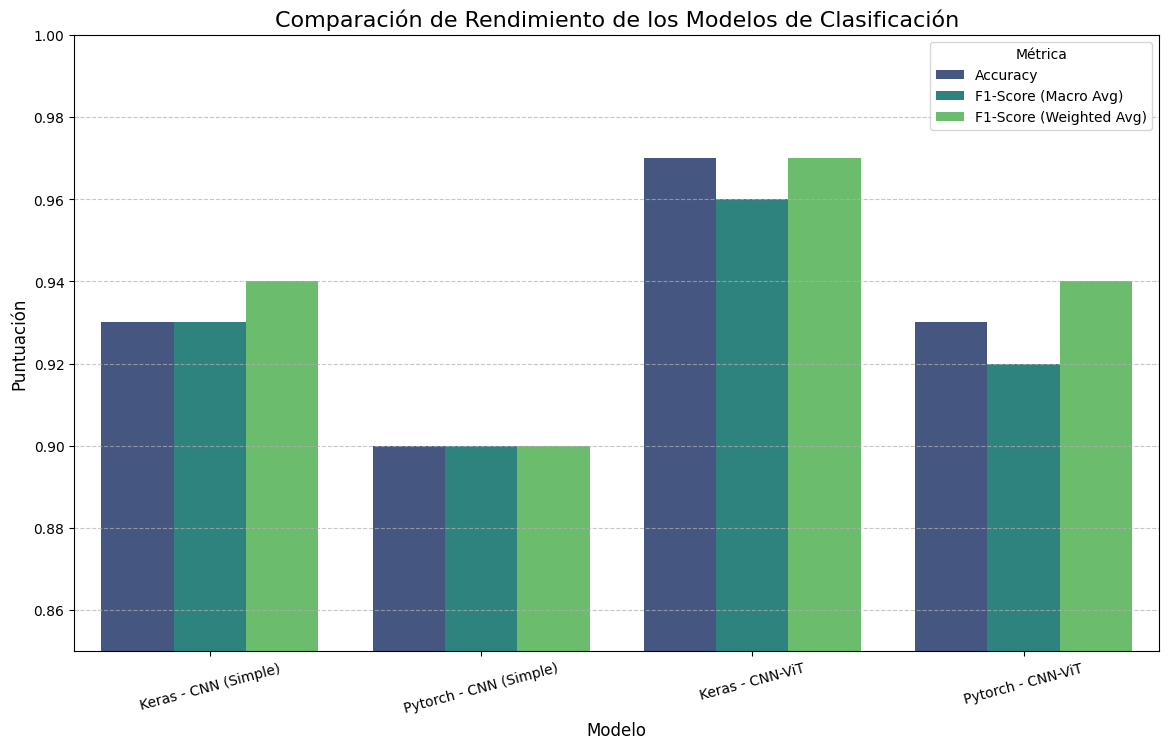

In [14]:
print("--- Tabla Comparativa de Rendimiento de Modelos ---")
print(results_df)

print("--- Visualización Comparativa ---")

#nueva columna que combina Framework y Arquitectura para las etiquetas
results_df['Modelo'] = results_df['Framework'] + ' - ' + results_df['Arquitectura']

df_melted = pd.melt(results_df, id_vars=['Modelo'], value_vars=['Accuracy', 'F1-Score (Macro Avg)', 'F1-Score (Weighted Avg)'],
                    var_name='Métrica', value_name='Puntuación')

#gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Modelo', y='Puntuación', hue='Métrica', palette='viridis')

#títulos y etiquetas 
plt.title('Comparación de Rendimiento de los Modelos de Clasificación', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Puntuación', fontsize=12)
plt.ylim(0.85, 1.0) # Hacemos zoom en la parte alta del gráfico para ver mejor las diferencias
plt.xticks(rotation=15) # Rotamos ligeramente las etiquetas para que no se superpongan
plt.legend(title='Métrica')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Conclusión Final del Proyecto

En este proyecto se han desarrollado, entrenado y optimizado cuatro modelos de Deep Learning distintos con el objetivo de clasificar imágenes de Fórmula 1 en tres categorías: `crash`, `f1` y `safety_car`. Se exploraron dos arquitecturas principales (CNN simple con Transfer Learning y una Híbrida CNN-Vision Transformer) y se implementaron en dos de los frameworks más importantes: Keras/TensorFlow y PyTorch.

### Principales Hallazgos

1.  **Alto Rendimiento General:** Tras un riguroso proceso de optimización de hiperparámetros, los cuatro modelos demostraron un rendimiento excelente, superando el **90% de precisión** en el conjunto de validación. Esto confirma la viabilidad de las técnicas de Transfer Learning para este dataset.

2.  **La Arquitectura Híbrida como la Más Potente:** El modelo **Híbrido CNN-ViT implementado en Keras** se destacó como el de mejor rendimiento, alcanzando una **precisión sobresaliente del 97%**. Este resultado valida la hipótesis de que combinar un extractor de características locales ya especializado (nuestra CNN optimizada) con la capacidad de los Transformers para analizar el contexto global de la imagen ofrece una ventaja de rendimiento significativa.

3.  **Comparación de Arquitecturas:** Si bien los modelos CNN simples fueron muy robustos (93% en Keras y 90% en PyTorch), los modelos híbridos mostraron el mayor potencial, con el modelo de Keras alcanzando el pico de rendimiento.

4.  **Comparación de Frameworks:** En este proyecto, las implementaciones en **Keras mostraron una ligera ventaja de rendimiento** sobre sus contrapartes en PyTorch, tanto en la arquitectura simple (93% vs 90%) como en la híbrida (97% vs 93%). Esto podría deberse a sutiles diferencias en la implementación de los optimizadores o a que el espacio de búsqueda de hiperparámetros favoreció a las configuraciones de Keras.

### Veredicto Final

El proyecto demuestra con éxito que, para este dataset específico, una **arquitectura híbrida CNN-ViT, optimizada y construida sobre Keras, proporciona la solución más precisa y robusta.**

